# Import Library

In [1]:
!pip install Sastrawi
!pip install nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.9 MB/s eta 0:00:00


In [2]:
filename = "Aspek Fasilitas Hotel Dprimahotel.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df.head()

,nama_hotel,nama_pelanggan,rating,ulasan
0,d'primahotel Tangerang,A***n,"8,5","Awalnya penasaran dgn bintangnya 4.9, tapi mmg..."
1,d'primahotel Tangerang,Yadi,9,untuk staff hotel ramah2. Hanya masukan saja p...
2,d'primahotel Tangerang,E***n,"9,6",Biaya tambahan breakfast untuk anak di bawah 1...
3,d'primahotel Tangerang,Si Geboy,10,"hotel na sangad nyaman staff na sngat ramah,, ..."
4,d'primahotel Tangerang,H budi k.,"8,4","Sesuai ekspektasi. Kamar-nya bersih, AC-nya di..."


In [3]:
df.drop(columns = ['nama_hotel', 'nama_pelanggan'], inplace = True)
df.columns = ['rating', 'ulasan']
df.head()

,rating,ulasan
0,"8,5","Awalnya penasaran dgn bintangnya 4.9, tapi mmg..."
1,9,untuk staff hotel ramah2. Hanya masukan saja p...
2,"9,6",Biaya tambahan breakfast untuk anak di bawah 1...
3,10,"hotel na sangad nyaman staff na sngat ramah,, ..."
4,"8,4","Sesuai ekspektasi. Kamar-nya bersih, AC-nya di..."


# Preprocessing Data

### Cleaning the text

In [4]:
import string
import re

In [5]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['clean_text'] = df['ulasan'].apply(lambda x: clean_text(x))

## Menambahkan fitur tambahan - panjang dan persentase tanda baca dalam teks

In [6]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['review_len'] = df['ulasan'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['ulasan'].apply(lambda x: count_punct(x))
df.head()

,rating,ulasan,clean_text,review_len,punct
0,"8,5","Awalnya penasaran dgn bintangnya 4.9, tapi mmg...",awalnya penasaran dgn bintangnya tapi mmg...,418,4.3
1,9,untuk staff hotel ramah2. Hanya masukan saja p...,untuk staff hotel ramah hanya masukan saja p...,491,2.6
2,"9,6",Biaya tambahan breakfast untuk anak di bawah 1...,biaya tambahan breakfast untuk anak di bawah ...,72,1.4
3,10,"hotel na sangad nyaman staff na sngat ramah,, ...",hotel na sangad nyaman staff na sngat ramah ...,388,0.5
4,"8,4","Sesuai ekspektasi. Kamar-nya bersih, AC-nya di...",sesuai ekspektasi kamar nya bersih ac nya di...,130,9.2


## Tokenization

In [7]:
import nltk

nltk.download('all')

from nltk.tokenize import word_tokenize

def tokenize_text(text):
    tokens = nltk.tokenize.word_tokenize(text)
    return tokens

df['tokens'] = df['clean_text'].apply(tokenize_text)

df.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

,rating,ulasan,clean_text,review_len,punct,tokens
0,"8,5","Awalnya penasaran dgn bintangnya 4.9, tapi mmg...",awalnya penasaran dgn bintangnya tapi mmg...,418,4.3,"[awalnya, penasaran, dgn, bintangnya, tapi, mm..."
1,9,untuk staff hotel ramah2. Hanya masukan saja p...,untuk staff hotel ramah hanya masukan saja p...,491,2.6,"[untuk, staff, hotel, ramah, hanya, masukan, s..."
2,"9,6",Biaya tambahan breakfast untuk anak di bawah 1...,biaya tambahan breakfast untuk anak di bawah ...,72,1.4,"[biaya, tambahan, breakfast, untuk, anak, di, ..."
3,10,"hotel na sangad nyaman staff na sngat ramah,, ...",hotel na sangad nyaman staff na sngat ramah ...,388,0.5,"[hotel, na, sangad, nyaman, staff, na, sngat, ..."
4,"8,4","Sesuai ekspektasi. Kamar-nya bersih, AC-nya di...",sesuai ekspektasi kamar nya bersih ac nya di...,130,9.2,"[sesuai, ekspektasi, kamar, nya, bersih, ac, n..."


## Stemming and Removing Stopwords

In [8]:
#Removing Stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()  # Membuat objek stopword remover

def stopword_text(tokens):
    # Gabungkan tokens menjadi sebuah string, lalu hilangkan stopword
    text = ' '.join(tokens)
    cleaned_text = stopword.remove(text)
    # Kembalikan hasilnya menjadi list token
    cleaned_tokens = cleaned_text.split()
    return cleaned_tokens

# Terapkan fungsi untuk menghapus stopwords
df['stopword'] = df['tokens'].apply(stopword_text)
df.head()


,rating,ulasan,clean_text,review_len,punct,tokens,stopword
0,"8,5","Awalnya penasaran dgn bintangnya 4.9, tapi mmg...",awalnya penasaran dgn bintangnya tapi mmg...,418,4.3,"[awalnya, penasaran, dgn, bintangnya, tapi, mm...","[awalnya, penasaran, dgn, bintangnya, mmg, sem..."
1,9,untuk staff hotel ramah2. Hanya masukan saja p...,untuk staff hotel ramah hanya masukan saja p...,491,2.6,"[untuk, staff, hotel, ramah, hanya, masukan, s...","[staff, hotel, ramah, masukan, pas, check, in,..."
2,"9,6",Biaya tambahan breakfast untuk anak di bawah 1...,biaya tambahan breakfast untuk anak di bawah ...,72,1.4,"[biaya, tambahan, breakfast, untuk, anak, di, ...","[biaya, tambahan, breakfast, anak, bawah, tahu..."
3,10,"hotel na sangad nyaman staff na sngat ramah,, ...",hotel na sangad nyaman staff na sngat ramah ...,388,0.5,"[hotel, na, sangad, nyaman, staff, na, sngat, ...","[hotel, na, sangad, nyaman, staff, na, sngat, ..."
4,"8,4","Sesuai ekspektasi. Kamar-nya bersih, AC-nya di...",sesuai ekspektasi kamar nya bersih ac nya di...,130,9.2,"[sesuai, ekspektasi, kamar, nya, bersih, ac, n...","[sesuai, ekspektasi, kamar, nya, bersih, ac, n..."


In [9]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming
def stemming_text(tokens):
    # Lakukan stemming pada setiap token dan gabungkan kembali dengan spasi
    return ' '.join([stemmer.stem(token) for token in tokens])

# Menerapkan fungsi stemming
df['ulasan_stemming'] = df['stopword'].apply(stemming_text)
df.head()

,rating,ulasan,clean_text,review_len,punct,tokens,stopword,ulasan_stemming
0,"8,5","Awalnya penasaran dgn bintangnya 4.9, tapi mmg...",awalnya penasaran dgn bintangnya tapi mmg...,418,4.3,"[awalnya, penasaran, dgn, bintangnya, tapi, mm...","[awalnya, penasaran, dgn, bintangnya, mmg, sem...",awal penasaran dgn bintang mmg semua serviceny...
1,9,untuk staff hotel ramah2. Hanya masukan saja p...,untuk staff hotel ramah hanya masukan saja p...,491,2.6,"[untuk, staff, hotel, ramah, hanya, masukan, s...","[staff, hotel, ramah, masukan, pas, check, in,...",staff hotel ramah masuk pas check in padahal t...
2,"9,6",Biaya tambahan breakfast untuk anak di bawah 1...,biaya tambahan breakfast untuk anak di bawah ...,72,1.4,"[biaya, tambahan, breakfast, untuk, anak, di, ...","[biaya, tambahan, breakfast, anak, bawah, tahu...",biaya tambah breakfast anak bawah tahun baik t...
3,10,"hotel na sangad nyaman staff na sngat ramah,, ...",hotel na sangad nyaman staff na sngat ramah ...,388,0.5,"[hotel, na, sangad, nyaman, staff, na, sngat, ...","[hotel, na, sangad, nyaman, staff, na, sngat, ...",hotel na sangad nyaman staff na sngat ramah ka...
4,"8,4","Sesuai ekspektasi. Kamar-nya bersih, AC-nya di...",sesuai ekspektasi kamar nya bersih ac nya di...,130,9.2,"[sesuai, ekspektasi, kamar, nya, bersih, ac, n...","[sesuai, ekspektasi, kamar, nya, bersih, ac, n...",sesuai ekspektasi kamar nya bersih ac nya ding...


In [10]:
# 1. Baca kamus lexicon positif dan negatif dengan bobotnya
df_positive = pd.read_csv("positive.tsv", sep="\t", header=None, names=["word", "weight"])
df_negative = pd.read_csv("negative.tsv", sep="\t", header=None, names=["word", "weight"])

# Lewati baris pertama (header) saat membuat kamus
lexicon_positive = dict(zip(df_positive["word"][1:], df_positive["weight"][1:].astype(int)))
lexicon_negative = dict(zip(df_negative["word"][1:], df_negative["weight"][1:].astype(int)))

# 2. Fungsi Menentukan Sentimen dengan Bobot
def determine_sentiment(text):
    score = 0
    words = text.split()  # Memecah teks menjadi kata-kata

    for word in words:
        if word in lexicon_positive:
            score += lexicon_positive[word]  # Tambahkan bobot positif
        elif word in lexicon_negative:
            score += lexicon_negative[word]  # Tambahkan bobot negatif

    # 3. Menentukan Label Sentimen Positif & Negatif
    if score > 0:
        return "1"  # Positif
    elif score < 0:
        return "0"  # Negatif
    else:
        return None  # Tidak ada label jika skor 0

# 4. Terapkan ke DataFrame Ulasan
df['label'] = df['ulasan_stemming'].apply(determine_sentiment)

# Menampilkan hasil dengan label yang telah ditentukan
df.head()

,rating,ulasan,clean_text,review_len,punct,tokens,stopword,ulasan_stemming,label
0,"8,5","Awalnya penasaran dgn bintangnya 4.9, tapi mmg...",awalnya penasaran dgn bintangnya tapi mmg...,418,4.3,"[awalnya, penasaran, dgn, bintangnya, tapi, mm...","[awalnya, penasaran, dgn, bintangnya, mmg, sem...",awal penasaran dgn bintang mmg semua serviceny...,1
1,9,untuk staff hotel ramah2. Hanya masukan saja p...,untuk staff hotel ramah hanya masukan saja p...,491,2.6,"[untuk, staff, hotel, ramah, hanya, masukan, s...","[staff, hotel, ramah, masukan, pas, check, in,...",staff hotel ramah masuk pas check in padahal t...,1
2,"9,6",Biaya tambahan breakfast untuk anak di bawah 1...,biaya tambahan breakfast untuk anak di bawah ...,72,1.4,"[biaya, tambahan, breakfast, untuk, anak, di, ...","[biaya, tambahan, breakfast, anak, bawah, tahu...",biaya tambah breakfast anak bawah tahun baik t...,1
3,10,"hotel na sangad nyaman staff na sngat ramah,, ...",hotel na sangad nyaman staff na sngat ramah ...,388,0.5,"[hotel, na, sangad, nyaman, staff, na, sngat, ...","[hotel, na, sangad, nyaman, staff, na, sngat, ...",hotel na sangad nyaman staff na sngat ramah ka...,1
4,"8,4","Sesuai ekspektasi. Kamar-nya bersih, AC-nya di...",sesuai ekspektasi kamar nya bersih ac nya di...,130,9.2,"[sesuai, ekspektasi, kamar, nya, bersih, ac, n...","[sesuai, ekspektasi, kamar, nya, bersih, ac, n...",sesuai ekspektasi kamar nya bersih ac nya ding...,1


# Exploratory Data Analysis (EDA)

Number of null in rating: 0
Number of null in ulasan: 0
Number of null in label: 17
Number of null in rating after handling: 0
Number of null in ulasan after handling: 0
Number of null in label after handling: 0


<Axes: xlabel='label', ylabel='count'>

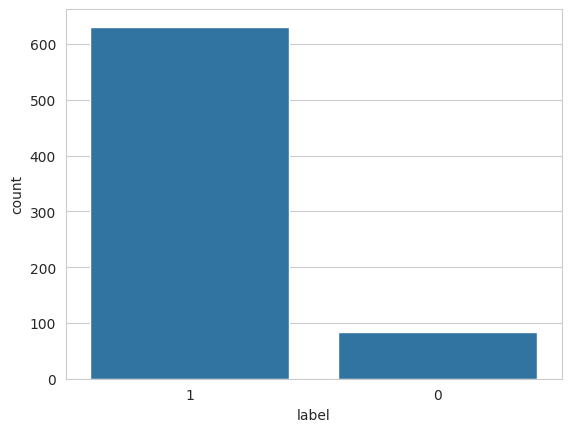

In [11]:
# Menampilkan jumlah nilai kosong (null) di setiap kolom
print(f"Number of null in rating: { df['rating'].isnull().sum() }")
print(f"Number of null in ulasan: { df['ulasan'].isnull().sum() }")
print(f"Number of null in label: { df['label'].isnull().sum() }")

# Menghapus baris yang memiliki nilai kosong di kolom 'label'
df = df.dropna(subset=['label'])

# Menampilkan jumlah nilai kosong setelah penghapusan
print(f"Number of null in rating after handling: { df['rating'].isnull().sum() }")
print(f"Number of null in ulasan after handling: { df['ulasan'].isnull().sum() }")
print(f"Number of null in label after handling: { df['label'].isnull().sum() }")

# Visualisasi distribusi label setelah penanganan nilai kosong
sns.countplot(x='label', data=df)


label positif (1) = 631 rows
label negatif (0) = 84 rows


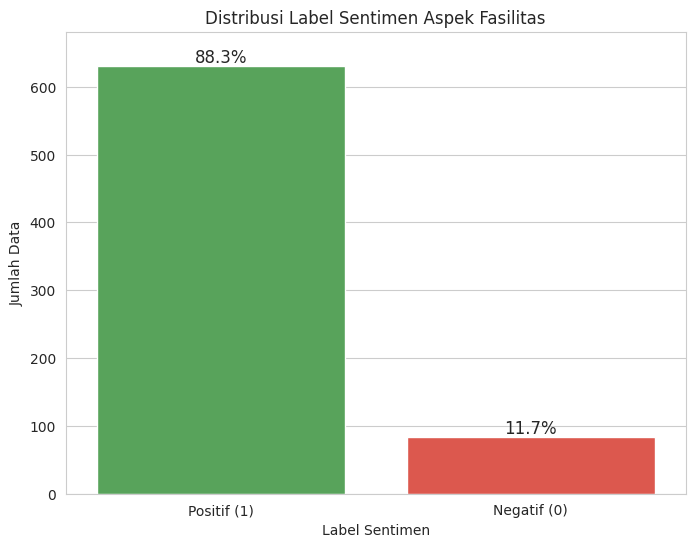

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung total data
total_data = len(df)

print(f"label positif (1) = {len(df[df['label']=='1'])} rows")
print(f"label negatif (0) = {len(df[df['label']=='0'])} rows")

# Hitung jumlah per label
label_counts = df['label'].value_counts()

# Hitung persentase
percentages = (label_counts / total_data) * 100

# Siapkan data
labels = ['Positif (1)', 'Negatif (0)']
colors = ['#4CAF50', '#F44336']
values = [label_counts['1'], label_counts['0']]
percent_labels = [percentages['1'], percentages['0']]

# Plot
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=labels, y=values, palette=colors)

# Tambahkan persentase di atas bar
for i, (count, percent) in enumerate(zip(values, percent_labels)):
    plt.text(i, count + 5, f"{percent:.1f}%", ha='center', fontsize=12)

plt.title('Distribusi Label Sentimen Aspek Fasilitas')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah Data')
plt.ylim(0, max(values) + 50)
plt.show()


# Visualizating Wordcloud

In [13]:
from wordcloud import WordCloud

In [14]:

df_positive = df[df['label'] == '1']
df_negative = df[df['label'] == '0']

# Convert to list
negative_list = df_negative['ulasan_stemming'].tolist()
positive_list = df_positive['ulasan_stemming'].tolist()



filtered_negative = ("").join(str(negative_list))  # Ubah list menjadi string
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list))  # Ubah list menjadi string
filtered_positive = filtered_positive.lower()



## Word Cloud: Ulasan Positif

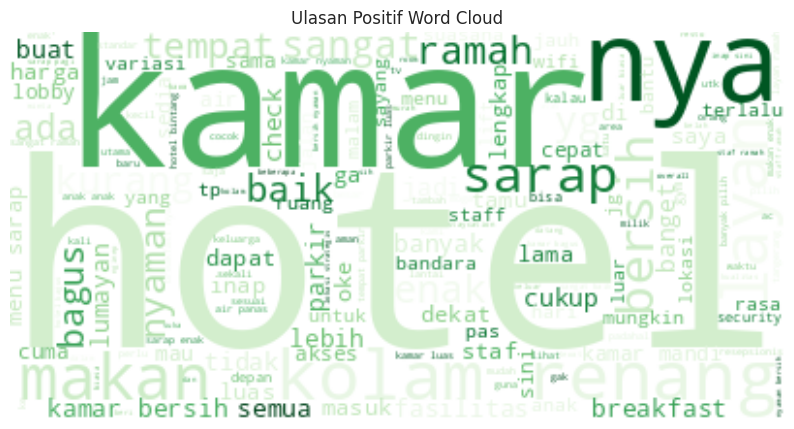

In [15]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Ulasan Positif Word Cloud")
plt.show()

## Word Colud: Ulasan Negatif

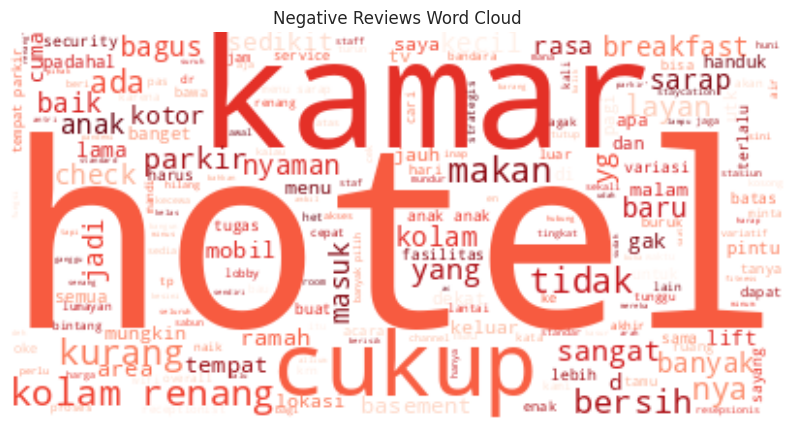

In [16]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

In [17]:
X = df[['ulasan_stemming', 'review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(715, 3)
(715,)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(500, 3)
(215, 3)
(500,)
(215,)


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2, ngram_range=(1,2)) # abaikan istilah yang muncul di lebih dari 50% dokumen dan yang muncul kurang dari 2% dokumen
tfidf_train = tfidf.fit_transform(X_train['ulasan_stemming'])
tfidf_test = tfidf.transform(X_test['ulasan_stemming'])

X_train_vect = pd.concat([X_train[['review_len', 'punct']].reset_index(drop=True),
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['review_len', 'punct']].reset_index(drop=True),
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head(5)

review_len  punct    0    1    2    3    4    5    6    7         8    9  \
0          69    2.9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
1          70    5.7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
2         172    3.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
3         167    4.8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.111803  0.0   
4         110    3.6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   

    10   11   12   13   14   15   16   17   18   19   20        21   22   23  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.235938  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   

    24   25   26   27   28   29   30   31   32   33   34   35   36   37   38  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    39   40   41   42   43   44   45   46        47   48   49   50   51   52  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.164811  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   

    53   54   55   56   57   58   59   60   61   62   63   64   65   66   67  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    68   69   70   71   72   73   74   75   76   77   78   79   80   81   82  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    83   84   85   86   87   88   89   90   91   92   93   94   95   96   97  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    98   99  100  101  102  103  104  105  106  107  108  109  110  111  112  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1

In [20]:
from collections import Counter
print("Distribusi Label Data Training:", Counter(y_train))

Distribusi Label Data Training: Counter({'1': 441, '0': 59})


In [21]:
from collections import Counter
print("Distribusi Label Data Testing:", Counter(y_test))

Distribusi Label Data Testing: Counter({'1': 190, '0': 25})


# Visualize Confusion Matrix

*   Vectorizer : TF-IDF




In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Support Vector Machine

              precision    recall  f1-score   support

           0       0.64      0.28      0.39        25
           1       0.91      0.98      0.94       190

    accuracy                           0.90       215
   macro avg       0.77      0.63      0.67       215
weighted avg       0.88      0.90      0.88       215



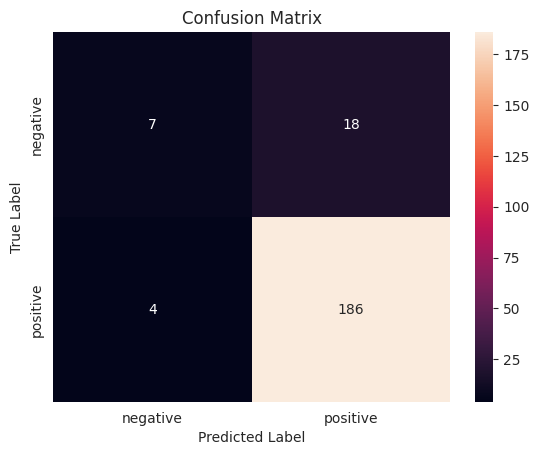

In [23]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', C=5)

X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()